In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('Window', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('j'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_landmarks(frame, results)

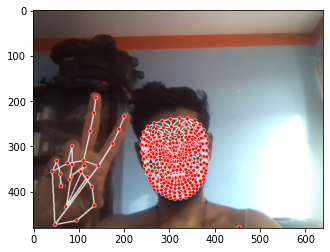

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [17]:
#PART 2: EXTRACT KEYPOINTS VALUE

In [18]:
len(results.pose_landmarks.landmark)

33

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

IndentationError: unexpected indent (Temp/ipykernel_6348/3987811915.py, line 2)

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 0.4895955 ,  0.67288095, -1.14930665, ...,  0.09623127,
        0.8079921 , -0.07677241])

In [25]:
np.save('0', result_test)

In [26]:
np.load('0.npy')

array([ 0.4895955 ,  0.67288095, -1.14930665, ...,  0.09623127,
        0.8079921 , -0.07677241])

In [98]:
#SETTING FOLDERS FOR DATA COLLECTION

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Ka', 'Sunday', 'Red', 'Father', '1'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [28]:
#ka
#Sunday
#Red
#Father
#1

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [30]:
#Data Collection

In [31]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('j'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


KeyboardInterrupt: 

In [32]:
cap.release()
cv2.destroyAllWindows()

In [33]:
#DATA PREPROCESSING AND LABELLING

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map = {label:num for num, label in enumerate(actions)}

In [36]:
label_map

{'Ka': 0, 'Sunday': 1, 'Red': 2, 'Father': 3, '1': 4}

In [37]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [38]:
np.array(sequences).shape

(150, 30, 1662)

In [39]:
np.array(labels).shape

(150,)

In [40]:
X = np.array(sequences)

In [41]:
X.shape

(150, 30, 1662)

In [42]:
y = to_categorical(labels).astype(int)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05) #split into test and train

In [44]:
X_train.shape

(142, 30, 1662)

In [45]:
#BUILD AND TRAIN LSTM NEURAL NETWORK

In [46]:
import os
from tensorflow.keras.models import Sequential   #to build sequential neural network
from tensorflow.keras.layers import LSTM, Dense  #helps to build the neural network
from tensorflow.keras.callbacks import TensorBoard 

In [47]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir) #tensorboard log book helps to monitor the training 

In [48]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))  #basically x_shape
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) #returns the values of probability between 0 and 1

In [49]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) #using Adam Optimizer

In [72]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback]) 

Epoch 1/2000
5/5 [==============================] - 5s 397ms/step - loss: 5.8033 - categorical_accuracy: 0.2113
Epoch 2/2000
5/5 [==============================] - 0s 62ms/step - loss: 5.4737 - categorical_accuracy: 0.2887
Epoch 3/2000
5/5 [==============================] - 0s 63ms/step - loss: 3.0474 - categorical_accuracy: 0.2324
Epoch 4/2000
5/5 [==============================] - 0s 64ms/step - loss: 4.1385 - categorical_accuracy: 0.1690
Epoch 5/2000
5/5 [==============================] - 0s 64ms/step - loss: 3.2393 - categorical_accuracy: 0.0775
Epoch 6/2000
5/5 [==============================] - 0s 63ms/step - loss: 2.3250 - categorical_accuracy: 0.1690
Epoch 7/2000
5/5 [==============================] - 0s 61ms/step - loss: 1.7975 - categorical_accuracy: 0.1338
Epoch 8/2000
5/5 [==============================] - 0s 72ms/step - loss: 1.5264 - categorical_accuracy: 0.3169
Epoch 9/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.5818 - categorical_accuracy: 0.3662

5/5 [==============================] - 1s 109ms/step - loss: 160.8485 - categorical_accuracy: 0.2183
Epoch 73/2000
5/5 [==============================] - 1s 109ms/step - loss: 113.7395 - categorical_accuracy: 0.1831
Epoch 74/2000
5/5 [==============================] - 1s 113ms/step - loss: 67.7426 - categorical_accuracy: 0.2042
Epoch 75/2000
5/5 [==============================] - 1s 113ms/step - loss: 53.5398 - categorical_accuracy: 0.2113
Epoch 76/2000
5/5 [==============================] - 1s 106ms/step - loss: 36.5389 - categorical_accuracy: 0.2042
Epoch 77/2000
5/5 [==============================] - 1s 108ms/step - loss: 28.9714 - categorical_accuracy: 0.2887
Epoch 78/2000
5/5 [==============================] - 1s 104ms/step - loss: 27.1500 - categorical_accuracy: 0.2254
Epoch 79/2000
5/5 [==============================] - 1s 109ms/step - loss: 54.5459 - categorical_accuracy: 0.1901
Epoch 80/2000
5/5 [==============================] - 1s 105ms/step - loss: 55.6816 - categorical_acc

5/5 [==============================] - 1s 107ms/step - loss: 1.2530 - categorical_accuracy: 0.4930
Epoch 145/2000
5/5 [==============================] - 1s 105ms/step - loss: 1.2387 - categorical_accuracy: 0.4789
Epoch 146/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.2498 - categorical_accuracy: 0.4085
Epoch 147/2000
5/5 [==============================] - 1s 108ms/step - loss: 1.2399 - categorical_accuracy: 0.4789
Epoch 148/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.2220 - categorical_accuracy: 0.4718
Epoch 149/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.2513 - categorical_accuracy: 0.5141
Epoch 150/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.2179 - categorical_accuracy: 0.4930
Epoch 151/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.2330 - categorical_accuracy: 0.4718
Epoch 152/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.2325 - categorical_accura

Epoch 216/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.1145 - categorical_accuracy: 0.5845
Epoch 217/2000
5/5 [==============================] - 1s 108ms/step - loss: 1.1305 - categorical_accuracy: 0.5141
Epoch 218/2000
5/5 [==============================] - 1s 105ms/step - loss: 1.0439 - categorical_accuracy: 0.4789
Epoch 219/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.0543 - categorical_accuracy: 0.5986
Epoch 220/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.0461 - categorical_accuracy: 0.5211
Epoch 221/2000
5/5 [==============================] - 1s 105ms/step - loss: 1.0264 - categorical_accuracy: 0.5282
Epoch 222/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.9058 - categorical_accuracy: 0.6338
Epoch 223/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.8655 - categorical_accuracy: 0.6127
Epoch 224/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.8254 - cat

5/5 [==============================] - 1s 106ms/step - loss: 0.8058 - categorical_accuracy: 0.6549
Epoch 288/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.8878 - categorical_accuracy: 0.5845
Epoch 289/2000
5/5 [==============================] - 1s 106ms/step - loss: 2.1883 - categorical_accuracy: 0.4789
Epoch 290/2000
5/5 [==============================] - 1s 104ms/step - loss: 2.1390 - categorical_accuracy: 0.2817
Epoch 291/2000
5/5 [==============================] - 1s 109ms/step - loss: 2.1005 - categorical_accuracy: 0.2324
Epoch 292/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.3776 - categorical_accuracy: 0.5000
Epoch 293/2000
5/5 [==============================] - 1s 108ms/step - loss: 1.3069 - categorical_accuracy: 0.6056
Epoch 294/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.2008 - categorical_accuracy: 0.5000
Epoch 295/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.2566 - categorical_accura

Epoch 359/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.8090 - categorical_accuracy: 0.6620
Epoch 360/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.8506 - categorical_accuracy: 0.6056
Epoch 361/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.9569 - categorical_accuracy: 0.5634
Epoch 362/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.1989 - categorical_accuracy: 0.5352
Epoch 363/2000
5/5 [==============================] - 1s 108ms/step - loss: 1.1072 - categorical_accuracy: 0.5845
Epoch 364/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.9626 - categorical_accuracy: 0.5634
Epoch 365/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.9182 - categorical_accuracy: 0.6056
Epoch 366/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.8888 - categorical_accuracy: 0.6127
Epoch 367/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.9554 - cat

5/5 [==============================] - 1s 107ms/step - loss: 0.9034 - categorical_accuracy: 0.6127
Epoch 431/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.9956 - categorical_accuracy: 0.6408
Epoch 432/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9191 - categorical_accuracy: 0.6127
Epoch 433/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.2422 - categorical_accuracy: 0.5775
Epoch 434/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.8498 - categorical_accuracy: 0.6620
Epoch 435/2000
5/5 [==============================] - 1s 111ms/step - loss: 0.7330 - categorical_accuracy: 0.7465
Epoch 436/2000
5/5 [==============================] - 1s 110ms/step - loss: 0.6684 - categorical_accuracy: 0.7394
Epoch 437/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.6267 - categorical_accuracy: 0.7394
Epoch 438/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.8062 - categorical_accura

5/5 [==============================] - 1s 105ms/step - loss: 0.6584 - categorical_accuracy: 0.6761
Epoch 502/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.6514 - categorical_accuracy: 0.7183
Epoch 503/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.6316 - categorical_accuracy: 0.7324
Epoch 504/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6295 - categorical_accuracy: 0.7183
Epoch 505/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.6512 - categorical_accuracy: 0.7113
Epoch 506/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.5843 - categorical_accuracy: 0.7394
Epoch 507/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.5983 - categorical_accuracy: 0.7324
Epoch 508/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.5887 - categorical_accuracy: 0.7465
Epoch 509/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5857 - categorical_accura

Epoch 573/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5514 - categorical_accuracy: 0.7817
Epoch 574/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5462 - categorical_accuracy: 0.7887
Epoch 575/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5694 - categorical_accuracy: 0.7606
Epoch 576/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5782 - categorical_accuracy: 0.7606
Epoch 577/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5719 - categorical_accuracy: 0.8028
Epoch 578/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5664 - categorical_accuracy: 0.7465
Epoch 579/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5709 - categorical_accuracy: 0.7535
Epoch 580/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5383 - categorical_accuracy: 0.8099
Epoch 581/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.5254 - cat

5/5 [==============================] - 1s 106ms/step - loss: 0.6236 - categorical_accuracy: 0.7324
Epoch 645/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6288 - categorical_accuracy: 0.7254
Epoch 646/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9678 - categorical_accuracy: 0.6338
Epoch 647/2000
5/5 [==============================] - 1s 102ms/step - loss: 11.7213 - categorical_accuracy: 0.1549
Epoch 648/2000
5/5 [==============================] - 1s 102ms/step - loss: 9.3943 - categorical_accuracy: 0.2324
Epoch 649/2000
5/5 [==============================] - 1s 98ms/step - loss: 11.0957 - categorical_accuracy: 0.2324
Epoch 650/2000
5/5 [==============================] - 1s 102ms/step - loss: 173.9773 - categorical_accuracy: 0.2324
Epoch 651/2000
5/5 [==============================] - 1s 106ms/step - loss: 276.4848 - categorical_accuracy: 0.1408
Epoch 652/2000
5/5 [==============================] - 1s 106ms/step - loss: 150.5473 - categorical

5/5 [==============================] - 1s 102ms/step - loss: 1.2462 - categorical_accuracy: 0.5352
Epoch 716/2000
5/5 [==============================] - 1s 103ms/step - loss: 1.1960 - categorical_accuracy: 0.5634
Epoch 717/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.1738 - categorical_accuracy: 0.5493
Epoch 718/2000
5/5 [==============================] - 1s 102ms/step - loss: 1.2238 - categorical_accuracy: 0.3803
Epoch 719/2000
5/5 [==============================] - 1s 105ms/step - loss: 1.2214 - categorical_accuracy: 0.5070
Epoch 720/2000
5/5 [==============================] - 1s 102ms/step - loss: 1.2944 - categorical_accuracy: 0.3662
Epoch 721/2000
5/5 [==============================] - 1s 102ms/step - loss: 1.2168 - categorical_accuracy: 0.5352
Epoch 722/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.1697 - categorical_accuracy: 0.5000
Epoch 723/2000
5/5 [==============================] - 1s 102ms/step - loss: 1.1412 - categorical_accura

Epoch 787/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.8998 - categorical_accuracy: 0.7394
Epoch 788/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9039 - categorical_accuracy: 0.8028
Epoch 789/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.8899 - categorical_accuracy: 0.7606
Epoch 790/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9188 - categorical_accuracy: 0.7254
Epoch 791/2000
5/5 [==============================] - 1s 102ms/step - loss: 1.1824 - categorical_accuracy: 0.5915
Epoch 792/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.0462 - categorical_accuracy: 0.6761
Epoch 793/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.0145 - categorical_accuracy: 0.6761
Epoch 794/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.8511 - categorical_accuracy: 0.8028
Epoch 795/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9105 - cat

5/5 [==============================] - 1s 106ms/step - loss: 0.8044 - categorical_accuracy: 0.7324
Epoch 859/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.9427 - categorical_accuracy: 0.6690
Epoch 860/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.7597 - categorical_accuracy: 0.7606
Epoch 861/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.8612 - categorical_accuracy: 0.7113
Epoch 862/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9450 - categorical_accuracy: 0.6408
Epoch 863/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.8878 - categorical_accuracy: 0.6479
Epoch 864/2000
5/5 [==============================] - 1s 102ms/step - loss: 1.0589 - categorical_accuracy: 0.5845
Epoch 865/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.8278 - categorical_accuracy: 0.7183
Epoch 866/2000
5/5 [==============================] - 1s 101ms/step - loss: 0.8676 - categorical_accura

5/5 [==============================] - 1s 106ms/step - loss: 0.8017 - categorical_accuracy: 0.7254
Epoch 931/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.8629 - categorical_accuracy: 0.6761
Epoch 932/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.7852 - categorical_accuracy: 0.7676
Epoch 933/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6613 - categorical_accuracy: 0.8099
Epoch 934/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.6965 - categorical_accuracy: 0.7606
Epoch 935/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6866 - categorical_accuracy: 0.7535
Epoch 936/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.6245 - categorical_accuracy: 0.8099
Epoch 937/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.6642 - categorical_accuracy: 0.7535
Epoch 938/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6317 - categorical_accura

5/5 [==============================] - 1s 108ms/step - loss: 0.5980 - categorical_accuracy: 0.7817
Epoch 1002/2000
5/5 [==============================] - 1s 98ms/step - loss: 0.5669 - categorical_accuracy: 0.8451
Epoch 1003/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5842 - categorical_accuracy: 0.8380
Epoch 1004/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5236 - categorical_accuracy: 0.8592
Epoch 1005/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6173 - categorical_accuracy: 0.7817
Epoch 1006/2000
5/5 [==============================] - 1s 110ms/step - loss: 0.6850 - categorical_accuracy: 0.7254
Epoch 1007/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.7647 - categorical_accuracy: 0.7324
Epoch 1008/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.6679 - categorical_accuracy: 0.7606
Epoch 1009/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6533 - categorical

Epoch 1072/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.8619 - categorical_accuracy: 0.6831
Epoch 1073/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.9104 - categorical_accuracy: 0.6338
Epoch 1074/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.3222 - categorical_accuracy: 0.4930
Epoch 1075/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.3217 - categorical_accuracy: 0.5000
Epoch 1076/2000
5/5 [==============================] - 1s 98ms/step - loss: 0.9575 - categorical_accuracy: 0.5704
Epoch 1077/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.9947 - categorical_accuracy: 0.5915
Epoch 1078/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.7319 - categorical_accuracy: 0.7535
Epoch 1079/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.8371 - categorical_accuracy: 0.6620
Epoch 1080/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.81

5/5 [==============================] - 1s 106ms/step - loss: 0.8791 - categorical_accuracy: 0.6549
Epoch 1144/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.8416 - categorical_accuracy: 0.6338
Epoch 1145/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.8455 - categorical_accuracy: 0.6761
Epoch 1146/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.6430 - categorical_accuracy: 0.8028
Epoch 1147/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6210 - categorical_accuracy: 0.8380
Epoch 1148/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6450 - categorical_accuracy: 0.8310
Epoch 1149/2000
5/5 [==============================] - 1s 103ms/step - loss: 0.6078 - categorical_accuracy: 0.8310
Epoch 1150/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6401 - categorical_accuracy: 0.7887
Epoch 1151/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5851 - categorica

5/5 [==============================] - 1s 123ms/step - loss: 0.5428 - categorical_accuracy: 0.8592
Epoch 1215/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.4897 - categorical_accuracy: 0.8521
Epoch 1216/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.5863 - categorical_accuracy: 0.7887
Epoch 1217/2000
5/5 [==============================] - 1s 111ms/step - loss: 0.5712 - categorical_accuracy: 0.7887
Epoch 1218/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.5444 - categorical_accuracy: 0.7958
Epoch 1219/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.6380 - categorical_accuracy: 0.7676
Epoch 1220/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.8056 - categorical_accuracy: 0.7113
Epoch 1221/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.0225 - categorical_accuracy: 0.6197
Epoch 1222/2000
5/5 [==============================] - 1s 108ms/step - loss: 1.1228 - categorica

5/5 [==============================] - 1s 106ms/step - loss: 0.4753 - categorical_accuracy: 0.8803
Epoch 1286/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.4537 - categorical_accuracy: 0.8803
Epoch 1287/2000
5/5 [==============================] - 1s 103ms/step - loss: 0.5574 - categorical_accuracy: 0.7958
Epoch 1288/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.4507 - categorical_accuracy: 0.8521
Epoch 1289/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.4617 - categorical_accuracy: 0.8521
Epoch 1290/2000
5/5 [==============================] - 1s 103ms/step - loss: 0.8053 - categorical_accuracy: 0.6690
Epoch 1291/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.9357 - categorical_accuracy: 0.6831
Epoch 1292/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.9977 - categorical_accuracy: 0.6127
Epoch 1293/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.7689 - categorica

5/5 [==============================] - 1s 108ms/step - loss: 0.5544 - categorical_accuracy: 0.8028
Epoch 1357/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.7376 - categorical_accuracy: 0.7254
Epoch 1358/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.5539 - categorical_accuracy: 0.7817
Epoch 1359/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.5326 - categorical_accuracy: 0.8310
Epoch 1360/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.5465 - categorical_accuracy: 0.8310
Epoch 1361/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.7444 - categorical_accuracy: 0.6620
Epoch 1362/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.5511 - categorical_accuracy: 0.8310
Epoch 1363/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.5069 - categorical_accuracy: 0.8803
Epoch 1364/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.6331 - categorica

5/5 [==============================] - 1s 107ms/step - loss: 3.7460 - categorical_accuracy: 0.2183
Epoch 1428/2000
5/5 [==============================] - 1s 106ms/step - loss: 2.7660 - categorical_accuracy: 0.2113
Epoch 1429/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.8521 - categorical_accuracy: 0.2887
Epoch 1430/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6985 - categorical_accuracy: 0.3592
Epoch 1431/2000
5/5 [==============================] - 1s 108ms/step - loss: 1.5666 - categorical_accuracy: 0.3028
Epoch 1432/2000
5/5 [==============================] - 1s 105ms/step - loss: 1.5632 - categorical_accuracy: 0.4225
Epoch 1433/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.5313 - categorical_accuracy: 0.2958
Epoch 1434/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.4226 - categorical_accuracy: 0.3803
Epoch 1435/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.3868 - categorica

Epoch 1498/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.7317 - categorical_accuracy: 0.7887
Epoch 1499/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.6695 - categorical_accuracy: 0.8592
Epoch 1500/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6989 - categorical_accuracy: 0.7535
Epoch 1501/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.6662 - categorical_accuracy: 0.7676
Epoch 1502/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.6772 - categorical_accuracy: 0.7394
Epoch 1503/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.6334 - categorical_accuracy: 0.8310
Epoch 1504/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.6807 - categorical_accuracy: 0.7887
Epoch 1505/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.6376 - categorical_accuracy: 0.8239
Epoch 1506/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6

5/5 [==============================] - 1s 106ms/step - loss: 0.6138 - categorical_accuracy: 0.7817
Epoch 1570/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.7198 - categorical_accuracy: 0.7042
Epoch 1571/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.5710 - categorical_accuracy: 0.8239
Epoch 1572/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.7438 - categorical_accuracy: 0.6620
Epoch 1573/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.1626 - categorical_accuracy: 0.6197
Epoch 1574/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.2309 - categorical_accuracy: 0.6338
Epoch 1575/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9678 - categorical_accuracy: 0.6197
Epoch 1576/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9331 - categorical_accuracy: 0.6338
Epoch 1577/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.6050 - categorica

5/5 [==============================] - 1s 108ms/step - loss: 0.7909 - categorical_accuracy: 0.6479
Epoch 1641/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.9304 - categorical_accuracy: 0.6056
Epoch 1642/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.8037 - categorical_accuracy: 0.7042
Epoch 1643/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.7063 - categorical_accuracy: 0.7324
Epoch 1644/2000
5/5 [==============================] - 1s 103ms/step - loss: 0.7857 - categorical_accuracy: 0.7535
Epoch 1645/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.5818 - categorical_accuracy: 0.7606
Epoch 1646/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.5751 - categorical_accuracy: 0.7958
Epoch 1647/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.5055 - categorical_accuracy: 0.7887
Epoch 1648/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.5135 - categorica

5/5 [==============================] - 1s 109ms/step - loss: 0.4613 - categorical_accuracy: 0.8310
Epoch 1712/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.4267 - categorical_accuracy: 0.8451
Epoch 1713/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.3566 - categorical_accuracy: 0.8592
Epoch 1714/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.4851 - categorical_accuracy: 0.8310
Epoch 1715/2000
5/5 [==============================] - 1s 108ms/step - loss: 0.4779 - categorical_accuracy: 0.8310
Epoch 1716/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.5708 - categorical_accuracy: 0.7958
Epoch 1717/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.3843 - categorical_accuracy: 0.8239
Epoch 1718/2000
5/5 [==============================] - 1s 109ms/step - loss: 0.5301 - categorical_accuracy: 0.8028
Epoch 1719/2000
5/5 [==============================] - 1s 107ms/step - loss: 0.3624 - categorica

Epoch 1782/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5070 - categorical_accuracy: 0.8451
Epoch 1783/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.4741 - categorical_accuracy: 0.8310
Epoch 1784/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.6819 - categorical_accuracy: 0.7746
Epoch 1785/2000
5/5 [==============================] - 1s 98ms/step - loss: 0.5193 - categorical_accuracy: 0.8169
Epoch 1786/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5435 - categorical_accuracy: 0.8099
Epoch 1787/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5552 - categorical_accuracy: 0.7535
Epoch 1788/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5358 - categorical_accuracy: 0.8028
Epoch 1789/2000
5/5 [==============================] - 1s 105ms/step - loss: 0.6410 - categorical_accuracy: 0.7958
Epoch 1790/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.64

5/5 [==============================] - 1s 106ms/step - loss: 0.6337 - categorical_accuracy: 0.7606
Epoch 1853/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.5250 - categorical_accuracy: 0.7958
Epoch 1854/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.4343 - categorical_accuracy: 0.8662
Epoch 1855/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.4976 - categorical_accuracy: 0.8028
Epoch 1856/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.4446 - categorical_accuracy: 0.8380
Epoch 1857/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.4417 - categorical_accuracy: 0.8662
Epoch 1858/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.4492 - categorical_accuracy: 0.8521
Epoch 1859/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5895 - categorical_accuracy: 0.7676
Epoch 1860/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5214 - categorica

5/5 [==============================] - 1s 106ms/step - loss: 0.9715 - categorical_accuracy: 0.6831
Epoch 1924/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.8523 - categorical_accuracy: 0.6901
Epoch 1925/2000
5/5 [==============================] - 1s 104ms/step - loss: 0.8485 - categorical_accuracy: 0.6549
Epoch 1926/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.7815 - categorical_accuracy: 0.6901
Epoch 1927/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.6568 - categorical_accuracy: 0.7042
Epoch 1928/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.6044 - categorical_accuracy: 0.7183
Epoch 1929/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.5258 - categorical_accuracy: 0.8451
Epoch 1930/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.4054 - categorical_accuracy: 0.8451
Epoch 1931/2000
5/5 [==============================] - 1s 103ms/step - loss: 0.4145 - categorica

5/5 [==============================] - 1s 101ms/step - loss: 0.2565 - categorical_accuracy: 0.9014
Epoch 1995/2000
5/5 [==============================] - 1s 102ms/step - loss: 0.2409 - categorical_accuracy: 0.9296
Epoch 1996/2000
5/5 [==============================] - 1s 110ms/step - loss: 0.2699 - categorical_accuracy: 0.9014
Epoch 1997/2000
5/5 [==============================] - 1s 110ms/step - loss: 0.3204 - categorical_accuracy: 0.8662
Epoch 1998/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.3272 - categorical_accuracy: 0.8592
Epoch 1999/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.3480 - categorical_accuracy: 0.8451
Epoch 2000/2000
5/5 [==============================] - 1s 106ms/step - loss: 0.3214 - categorical_accuracy: 0.8873


In [73]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 596,741
Trainable params: 596,741
Non-trainable params: 0
__________________________________________________

In [74]:
#Make Predicitions

In [75]:
res = model.predict(X_test)

In [76]:
np.sum(res[0])

1.0

In [94]:
actions[np.argmax(res[1])]

'Ka'

In [95]:
actions[np.argmax(y_test[1])]

'1'

In [96]:
#Save weights

In [97]:
model.save('action.h5')

In [98]:
#Evaluation using confusion matrix and accuracy

In [99]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [100]:
yhat = model.predict(X_test)

In [101]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [102]:
ytrue

[4, 4, 4, 1, 3, 3, 2, 4]

In [103]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[7, 0],
        [0, 1]],

       [[7, 0],
        [0, 1]],

       [[3, 3],
        [0, 2]],

       [[4, 0],
        [3, 1]]], dtype=int64)

In [104]:
accuracy_score(ytrue, yhat)  

0.625

In [105]:
# TEST IN REAL TIME

In [106]:
#IN 209
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.5 #threshold
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
         # 2. Prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
        
         #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
           

        # Show to screen
        cv2.imshow('Window', image)

    
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('j'):
            
            break
    cap.release()
    cv2.destroyAllWindows()
    


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Red
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Red
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Red
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Red
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Red
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ka
<class 'mediapipe.python.solutio

In [68]:
cap.release()
cv2.destroyAllWindows()
    

In [90]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[8.63324851e-03, 1.05652354e-04, 3.29559036e-02, 8.91378999e-01,
        6.69262558e-02]], dtype=float32)